##データセット作成

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import timedelta
from pathlib import Path


p = Path("/content/drive/Othercomputers/MyPC/Desktop/customers")
print(p)
file_name = '*.CSV'
csv_files = p.glob(file_name)
print(csv_files)
df = pd.DataFrame()

for i in csv_files:
    tmp_df = pd.read_csv(i,encoding='shift_jis')
    # DataFrameを連結する
    df = pd.concat([df, tmp_df])

df["日付"] = pd.to_datetime(df["日付"])
#データを日付順にソート
df = df.sort_values("日付",ascending=True).reset_index(drop=True)
print(df.head())
print(df.tail())

In [ ]:
df_ = df.set_index('日付')  # datetimeをindexに指定
df_ = df_.asfreq(freq='D')
df_fill = df_.reset_index()  # indexを元に戻す

na_row = df_fill.isnull().any(axis=1)
df_fill.loc[na_row,:]

df = df_fill

df = df.set_axis(['date','weekday',"7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","0","1","2","3","4","5","6"], axis=1)
df = df.drop(["7","0","1","2","3","4","5","6"],axis=1)
print(df.head(3))

In [ ]:
datalist = []
timelist = []
dt = timedelta(hours=1)

for i in range(0,len(df)):
    datalist = np.append(datalist,df.iloc[i,2:].values) #データリスト
    date_list = [df.iloc[i,0] + dt*8 + timedelta(hours=k) for k in range(16)]
    date_list = np.array(date_list)
    timelist = np.append(timelist,date_list) #時間リスト
print(len(datalist),len(timelist))

df_date = pd.DataFrame(np.array([timelist,datalist]).T,columns=["datetime","customers"])
print(df_date.head())

df = df.set_index('datetime')
df_date.info()

#ここ以前で作成したデータフレームを保存
#df_date.to_csv("customers.csv",index=False)

In [ ]:
#df_hour = pd.DataFrame({'datetime':pd.date_range(start='2019-1-1',end='2022-8-31 23:00:00',freq='H')})
df = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/customers.csv",encoding='shift_jis')
df["date"] = pd.to_datetime(df["date"]) #dateをdatetime型に変更
df.customers[df.date == "2021-11-23 21:00:00"] = None #来客数1000人の記入ミスを修正

#欠損値を埋める
#df["customers"].iloc[16108:16112] = df["customers"].iloc[15884:15888]
#df["customers"].iloc[16112:16240] = df["customers"].iloc[15888:15888+(16240-16112)]
#df_hour = df_hour.reset_index().rename(columns={'datetime': 'date'})
#df = pd.merge(df_hour, df, on='date', how='left')

df.to_csv("customers_P.csv",index=False)

In [ ]:
df.customers.isnull().sum()

129

In [ ]:
holiday = pd.DataFrame()
holiday.index = mydf.index
holiday["holiday"] = 0
#2019
holiday["2019-02-11"] = 1
holiday["2019-03-21"] = 1
holiday["2019-04-29":"2019-04-30"] = 1
holiday["2019-05-01":"2019-05-06"] = 1 #GW
holiday["2019-07-15"] = 1
holiday["2019-08-12":"2019-08-15"] = 1
holiday["2019-09-16"] = 1
holiday["2019-09-23"] = 1
holiday["2019-10-14"] = 1
holiday["2019-10-22"] = 1
holiday["2019-11-04"] = 1
#2020
holiday["2020-01-13"] = 1
holiday["2020-02-11"] = 1
holiday["2020-02-24"] = 1
holiday["2020-03-20"] = 1
holiday["2020-04-29"] = 1
holiday["2020-05-01":"2020-05-06"] = 1 #GW
holiday["2020-07-23":"2020-07-24"] = 1
holiday["2020-08-10"] = 1
holiday["2020-08-13":"2020-08-14"] = 1
holiday["2020-09-21":"2020-09-22"] = 1
holiday["2020-11-03"] = 1
holiday["2020-11-23"] = 1
#2021
holiday["2021-01-11"] = 1
holiday["2021-02-11"] = 1
holiday["2021-04-29"] = 1
holiday["2021-05-03":"2021-05-05"] = 1 #GW
holiday["2021-07-22":"2021-07-23"] = 1
holiday["2021-08-09"] = 1
holiday["2021-08-13"] = 1
holiday["2021-08-16"] = 1
holiday["2021-09-20"] = 1
holiday["2021-09-23"] = 1
holiday["2021-10-03"] = 1 #欠損値を埋めているため架空の祝日
holiday["2021-11-03"] = 1
holiday["2021-11-23"] = 1
#2022
holiday["2022-01-10"] = 1
holiday["2022-02-11"] = 1
holiday["2022-02-23"] = 1
holiday["2022-03-21"] = 1
holiday["2022-04-29"] = 1
holiday["2022-05-03":"2022-05-05"] = 1 #GW
holiday["2022-07-18"] = 1
holiday["2022-08-11"] = 1
holiday["2022-08-15":"2022-08-16"] = 1
holiday.to_csv("holiday_P.csv",index=False)

In [ ]:
holiday = pd.DataFrame()
holiday.index = mydf.index
holiday["holiday"] = 0
#2019
holiday["2019-02-11"] = 1
holiday["2019-03-21"] = 1
holiday["2019-07-15"] = 1
holiday["2019-09-16"] = 1
holiday["2019-09-23"] = 1
holiday["2019-10-14"] = 1
holiday["2019-10-22"] = 1
holiday["2019-11-04"] = 1
#2020
holiday["2020-01-13"] = 1
holiday["2020-02-11"] = 1
holiday["2020-02-24"] = 1
holiday["2020-03-20"] = 1
holiday["2020-04-29"] = 1
holiday["2020-07-23":"2020-07-24"] = 1
holiday["2020-09-21":"2020-09-22"] = 1
holiday["2020-11-03"] = 1
holiday["2020-11-23"] = 1
#2021
holiday["2021-01-11"] = 1
holiday["2021-02-11"] = 1
holiday["2021-04-29"] = 1
holiday["2021-07-22":"2021-07-23"] = 1
holiday["2021-09-20"] = 1
holiday["2021-09-23"] = 1
holiday["2021-11-03"] = 1
holiday["2021-11-23"] = 1
#2022
holiday["2022-01-10"] = 1
holiday["2022-02-11"] = 1
holiday["2022-02-23"] = 1
holiday["2022-03-21"] = 1
holiday["2022-07-18"] = 1
holiday.to_csv("holiday_P.csv",index=False)

##実験

In [ ]:
mydf.tail(4)

In [ ]:
import statsmodels.api as sm
import os
import glob
#Lasso
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
#LSTM
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import math
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler #最小値を0、最大値を1にする正規化
from pathlib import Path

df = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/customers.csv",encoding='shift_jis')
df["date"] = pd.to_datetime(df["date"]) #dateをdatetime型に変更
df.customers[df.date == "2021-11-23 21:00:00"] = 10 #来客数1000人の記入ミスを修正
#欠損値を埋める
df["customers"].iloc[16108:16240] = df["customers"].iloc[15660:15792]

#曜日を追加するための関数を定義
def get_weekday(data):
    w_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return(w_list[data.weekday()])
df["weekday"] = df["date"].apply(get_weekday) #曜日を追加

rain = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/rain.csv")
rain = rain.drop("date", axis=1)
df = pd.concat([df,rain], axis = 1)

emergency = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/emergency.csv")
df = pd.concat([df,emergency], axis = 1)

#holiday = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/holiday_P.csv")
#df = pd.concat([df,holiday], axis = 1)

#covid19 =  pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/datafiles/covid19.csv")
#covid19.infected.iloc[:] = covid19.infected.iloc[:]+1
#df = pd.concat([df,covid19], axis = 1)

mydf = df.set_index('date') #インデックスをdateに変更

#感染者数（倍率）
#for i in range(0,len(covid19) - 16):
#    mydf.infected.iloc[i+16] = covid19.infected.iloc[i+16]/covid19.infected.iloc[i]
#mydf.infected = mydf.infected*mydf.emergency
#mydf = mydf.drop("emergency",axis=1)
#曜日
mydf = pd.get_dummies(mydf) #カテゴリ変数をダミー変数化（曜日）

In [ ]:
#学習用のデータフレームを作成
tra_df = mydf[mydf.index <"2021-9-01 8:00:00"]
tra_e = mydf[mydf.index <"2021-9-01 8:00:00"]
#評価用(1年間)のデータフレームを作成
eval_df = mydf[mydf.index >= "2021-9-01 8:00:00"]
eval_e = mydf[mydf.index >= "2021-9-01 8:00:00"]
#対数変換
tra_e.customers.iloc[:] = np.log(tra_df.customers.iloc[:] + 1)
eval_e.customers.iloc[:] = np.log(eval_df.customers.iloc[:] + 1)
mydf_e = pd.concat([tra_e,eval_e],axis=0)
#print(eval_df.customers.head(4))

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib
japanize_matplotlib.japanize()

###成分調査

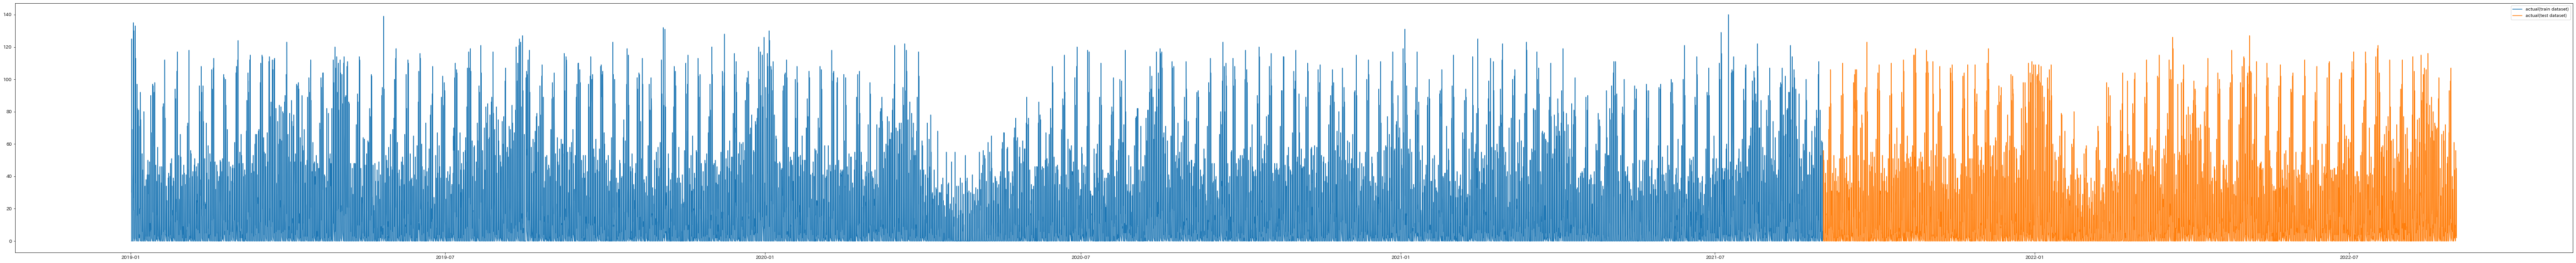

In [ ]:
#来客数可視化
fig, ax = plt.subplots(figsize = (100,10))
ax.plot(tra_df.index, tra_df.customers, label="actual(train dataset)")
ax.plot(eval_df.index, eval_df.customers, label="actual(test dataset)")
plt.legend()

AttributeError: ignored

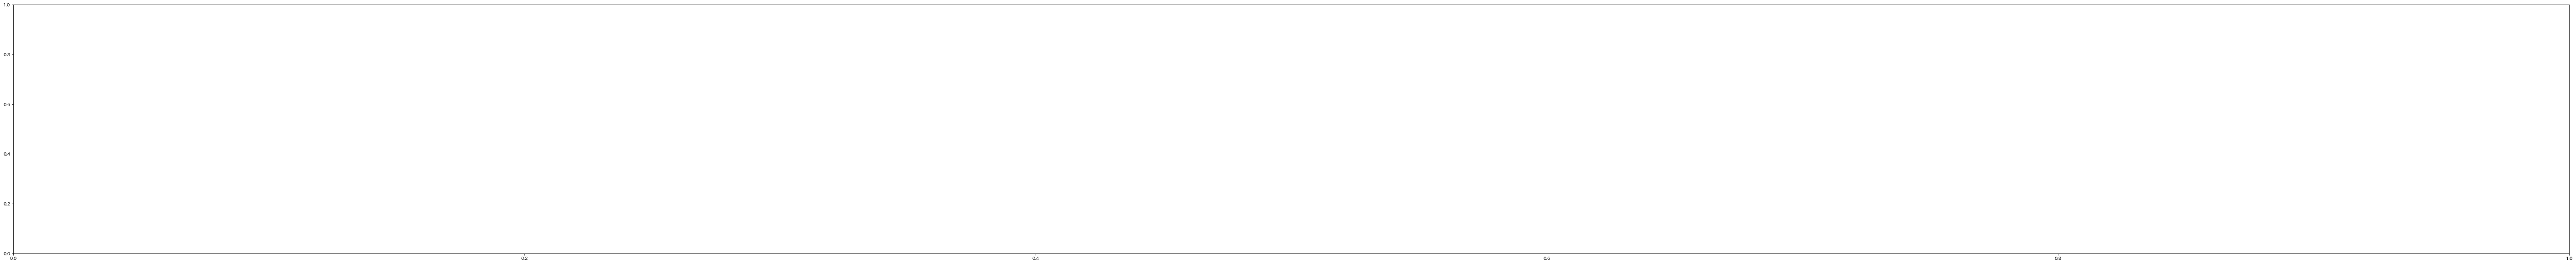

In [ ]:
#その他可視化
fig, ax = plt.subplots(figsize = (100,10))
ax.plot(tra_df.index, tra_df.infected, label="actual(train dataset)")
ax.plot(eval_df.index, eval_df.infected, label="actual(test dataset)")
plt.legend()

In [ ]:
#コレログラムの作成
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams["figure.figsize"] = (20, 5)

#横軸にラグ、縦軸に自己相関
plot_acf(tra_e['customers'], lags=75)
#偏自己相関グラフ
#plot_pacf(mydf['customers'], lags=30)
plt.show()

In [ ]:
#!git clone http://github.com/statsmodels/statsmodels.git
#import os
#p = "/content/statsmodels/statsmodels/tsa/stl"
#os.chdir(p)
#!ls
#!python3 mstl.py

In [ ]:
#STL分解

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
#from statsmodels.tsa.seasonal import MSTL

period = 16
stl = STL(tra_e.customers, period=period)
dr = stl.fit()

_, axes = plt.subplots(figsize=(50, 20), ncols=1, nrows=4, sharex=True)

axes[0].set_title("観測値")
axes[0].plot(dr.observed)
axes[0].grid()

axes[1].set_title("トレンド")
axes[1].plot(dr.trend)
axes[1].grid()

axes[2].set_title("季節性")
axes[2].plot(dr.seasonal)
axes[2].grid()

axes[3].set_title("その他の要因・残差")
axes[3].plot(dr.resid)
axes[3].grid()

plt.tight_layout()
plt.show()

In [ ]:
#STL分解（2回目）
trend = pd.DataFrame(dr.trend)
trend.columns = ["customers"]

period = 16*7
stl = STL(trend.customers, period=period)
dr = stl.fit()

_, axes = plt.subplots(figsize=(50, 20), ncols=1, nrows=4, sharex=True)

axes[0].set_title("観測値")
axes[0].plot(dr.observed)
axes[0].grid()

axes[1].set_title("トレンド")
axes[1].plot(dr.trend)
axes[1].grid()

axes[2].set_title("季節性")
axes[2].plot(dr.seasonal)
axes[2].grid()

axes[3].set_title("その他の要因・残差")
axes[3].plot(dr.resid)
axes[3].grid()

plt.tight_layout()
plt.show()

In [ ]:
#トレンドと残差の自己相関を確認
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle("トレンドの自己相関・偏自己相関")
plot_acf(dr.trend, ax=axes[0]) #1日毎の周期性しか取り出していないため、トレンドに周期性が残ってしまっている。
plot_pacf(dr.trend, method="ywm", ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
trend = dr.trend + dr.resid
trend = pd.DataFrame(trend)
trend.columns = ["customers"]
tra_df = trend
print(tra_df)

In [ ]:
trainY = tra_e.customers
trainX = tra_e.drop("customers", axis = 1)

testY = eval_e.customers
testX = eval_e.drop("customers",axis = 1)

print(trainX.head(2))
print(testY.head(2))
#print(testX.shape)
#print(testY.shape)

##Prophetの実装

MAE(test):	11.815
0.47723061958967616


Text(0, 0.5, '予測値（人）')

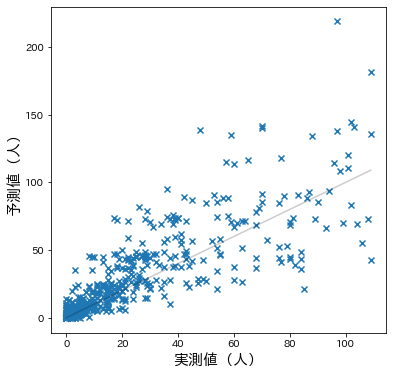

In [ ]:
Prophet_log = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/Prophet_log.csv",encoding='shift_jis')
Prophet = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/Prophet.csv",encoding='shift_jis')
Prophet_log = pd.read_csv("/content/drive/Othercomputers/MyPC/Desktop/customers/myfiles/Prophet_linear.csv",encoding='shift_jis')
span = 16*(30+31+30+31)
data = Prophet_linear[span:span+16*31]
data0 = eval_df.customers[span:span+16*31]
#data = Prophet_linear
#data0 = eval_df.customers
data = data.values.flatten()
test_mae =mae(data0, data)
print('MAE(test):\t{:.5}'.format(test_mae))
#自由度調節済決定係数
from sklearn.metrics import r2_score
r2 = 1-(1 - r2_score(data0, data))*(len(eval_df)-1) / (len(eval_df) - eval_df.shape[1] -1)
print(r2)
y_min, y_max = np.min(data0), np.max(data0)
plt.figure(figsize=(6, 6))
#plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(data0, data, marker="x")
plt.xlabel("実測値（人）",fontsize=15,fontname='IPAexGothic')
plt.ylabel("予測値（人）",fontsize=15,fontname='IPAexGothic')

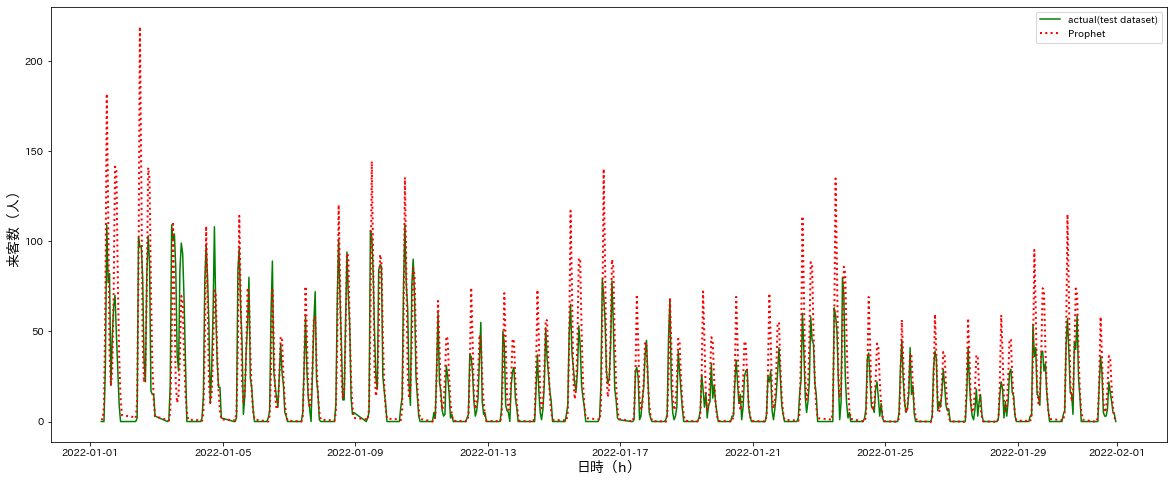

In [ ]:
#予測結果を可視化
plt.subplots(figsize = (20,8))
y = eval_df.customers[(eval_df.index < "2022-2-1") & (eval_df.index >= "2022-1-1")]
length = len(eval_df[eval_df.index <= "2022-1-1"])#日付が早い方に合わせる
plot_test = data[length:len(y)+length]
sns.lineplot(y.index, y.values, label="actual(test dataset)",c="g")
sns.lineplot(y.index, plot_test, label="Prophet", linestyle="dotted", lw=2 , color="r")
plt.xlabel("日時（h）",fontsize=14,fontname='IPAexGothic')
plt.ylabel("来客数（人）",fontsize=14,fontname='IPAexGothic')
plt.legend()

In [ ]:
#Prophet
!pip install pystan==2.19.1.1
!pip install fbprophet

(目的変数の対数変換前)The best parameters are :
 {'changepoint_prior_scale': 0.15651460111195634, 'seasonality_prior_scale': 9.426579244556144, 'seasonality_mode': 'additive', 'changepoint_range': 0.865, 'n_changepoints': 33}

( 目的変数の対数変換後)

{'changepoint_prior_scale': 0.31846394046594684, 'seasonality_prior_scale': 3.486173556009627, 'changepoint_range': 0.8640000000000001, 'n_changepoints': 34}

In [ ]:
from fbprophet import Prophet
# 列名の変更
mydf_e = mydf_e.reset_index().rename(columns={'date': 'ds', 'customers': 'y'})
tra_e = tra_e.reset_index().rename(columns={'date': 'ds', 'customers': 'y'})
eval_e = eval_e.reset_index().rename(columns={'date': 'ds', 'customers': 'y'})
mydf = mydf.reset_index().rename(columns={'date': 'ds', 'customers': 'y'})
tra_df = tra_df.reset_index().rename(columns={'date': 'ds', 'customers': 'y'})
eval_df = eval_df.reset_index().rename(columns={'date': 'ds', 'customers': 'y'})

#best_params = {'changepoint_prior_scale' : 0.15651460111195634,
#          'seasonality_prior_scale' : 9.426579244556144,
#          'seasonality_mode' : 'additive',
#          'changepoint_range' : 0.865,
#          'n_changepoints' : 40}
best_params = {'changepoint_prior_scale' : 0.31846394046594684,
          'seasonality_prior_scale' : 3.486173556009627,
          'seasonality_mode' : 'additive',
          'changepoint_range' : 0.8640000000000001,
          'n_changepoints' : 40}
CD = pd.DataFrame({"holiday":"CD",
                         'ds': pd.to_datetime(["2019-02-11","2019-03-21","2019-07-15","2019-09-16","2019-09-23","2019-10-14","2019-10-22","2019-11-04",
                                               "2020-01-13","2020-02-11","2020-02-24","2020-03-20","2020-04-29","2020-07-23","2020-09-21","2020-09-22","2020-04-29","2020-11-03","2020-11-23",
                                               "2021-01-11","2021-02-11","2021-04-29","2021-07-22","2021-07-23","2021-09-20","2021-09-23","2021-11-03","2021-11-23",
                                               "2022-01-10","2022-02-11","2022-02-23","2022-03-21","2022-07-18"
                                               ]),
                        'lower_window': 0,
                        'upper_window': 0
                         })
Christmas = pd.DataFrame({"holiday":"Christmas",
                         'ds': pd.to_datetime(['2019-12-24','2019-12-25',
                                               '2020-12-24','2020-12-25',
                                               '2021-12-24', '2021-12-25',
                                               '2022-12-24','2022-12-25'
                                               ]),
                        'lower_window': 0,
                        'upper_window': 0
                         })
BB = pd.DataFrame({"holiday":"BB",
                         'ds': pd.to_datetime(["2019-08-10","2019-08-11","2019-08-12","2019-08-13","2019-08-14","2019-08-15","2019-08-16",
                                               "2020-08-08","2020-08-09","2020-08-10","2020-08-13","2020-08-14","2020-08-15","2020-08-16",
                                               "2021-08-07","2021-08-08","2021-08-09","2021-08-13","2021-08-14","2021-08-15","2021-08-16",
                                               "2022-08-06","2022-08-07","2022-08-13","2022-08-14","2022-08-11","2022-08-12","2022-08-15","2022-08-16"
                                               ]),
                        'lower_window': 0,
                        'upper_window': 0
                         })
GW = pd.DataFrame({"holiday":"GW",
                         'ds': pd.to_datetime(["2019-04-27","2019-04-28","2019-04-29","2019-04-30","2019-05-01","2019-05-02","2019-05-03","2019-05-04","2019-05-05","2019-05-06",
                                               "2020-05-02","2020-05-03","2020-05-04","2020-05-05","2020-05-06",
                                               "2021-05-01","2021-05-02","2021-05-03","2021-05-04","2021-05-05",
                                               "2022-04-29","2022-04-30","2022-05-01","2022-05-03","2022-05-04","2022-05-05"
                                               ]),
                    'lower_window': 0,
                    'upper_window': 0,
                         })
NY = pd.DataFrame({"holiday":"NY",
                   'ds': pd.to_datetime(["2019-01-01",'2019-01-02','2019-01-03','2019-01-04','2019-01-05',
                                         '2020-01-01', '2020-01-02','2020-01-03','2020-01-04','2020-01-05',
                                         '2020-12-28','2020-12-29','2020-12-30','2020-12-31',
                                         '2021-01-01', '2021-01-02','2021-01-03','2021-01-04','2021-01-05',
                                         '2021-12-28', '2021-12-29','2021-12-30','2021-12-31',
                                         '2022-01-01', '2022-01-02','2022-01-03','2022-01-04','2022-01-05']),
                    'lower_window': 0,
                    'upper_window': 0
                    })
school = pd.DataFrame({"holiday":"school",
                         'ds': pd.to_datetime(["2019-03-18 10:00:00","2019-03-18 11:00:00","2019-03-18 12:00:00","2019-03-18 13:00:00","2019-03-18 14:00:00",
                                               "2019-04-09 10:00:00","2019-04-09 11:00:00","2019-04-09 12:00:00","2019-04-09 13:00:00","2019-04-09 14:00:00",
                                               "2020-03-23 10:00:00","2020-03-23 11:00:00","2020-03-23 12:00:00","2020-03-23 13:00:00","2020-03-23 14:00:00",
                                               "2020-04-09 10:00:00","2020-04-09 11:00:00","2020-04-09 12:00:00","2020-04-09 13:00:00","2020-04-09 14:00:00",
                                               "2021-03-18 10:00:00","2021-03-18 11:00:00","2021-03-18 12:00:00","2021-03-18 13:00:00","2021-03-18 14:00:00",
                                               "2021-04-09 10:00:00","2021-04-09 11:00:00","2021-04-09 12:00:00","2021-04-09 13:00:00","2021-04-09 14:00:00",
                                               "2022-03-18 10:00:00","2022-03-18 11:00:00","2022-03-18 12:00:00","2022-03-18 13:00:00","2022-03-18 14:00:00",
                                               "2022-04-11 10:00:00","2022-04-11 11:00:00","2022-04-11 12:00:00","2022-04-11 13:00:00","2022-04-11 14:00:00"
                                               ]),
                    'lower_window': 0,
                    'upper_window': 0
                         })
holidays = pd.concat((CD,Christmas,NY,GW,BB,school))
model = Prophet(
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",**best_params,
    growth="logistic",
    holidays=holidays
    ) #holidays_prior_scale=10 #規定値は10 #0.05でRMSE14.301

#周期性の追加
#model.add_seasonality(name='daily', period=16,fourier_order=5)
# 学習
model.add_regressor("precipitation")
model.add_regressor("emergency")
model.add_regressor("weekday_Monday")
model.add_regressor("weekday_Tuesday")
model.add_regressor("weekday_Wednesday")
model.add_regressor("weekday_Thursday")
model.add_regressor("weekday_Friday")
model.add_regressor("weekday_Saturday")
model.add_regressor("weekday_Sunday")
#fourier_tra = fourier.iloc[:len(tra_e),:]
#tra_e = pd.concat([tra_e,fourier_tra],axis=1)
#logisticのみ
tra_e["cap"] = 2
tra_e['floor'] = 0
model.fit(tra_e)

#予測
future = model.make_future_dataframe(periods=len(eval_df))
future["ds"] = mydf.ds
#future = pd.concat([future,fourier],axis=1)
#最大値を設定(logisticのみ)
future['cap'] = 2
future['floor'] = 0

#説明変数を追加した予測
future["precipitation"] = mydf_e.precipitation
future["emergency"] = mydf_e.emergency
future["weekday_Monday"] = mydf_e.weekday_Monday
future["weekday_Tuesday"] = mydf_e.weekday_Tuesday
future["weekday_Wednesday"] = mydf_e.weekday_Wednesday
future["weekday_Thursday"] = mydf_e.weekday_Thursday
future["weekday_Friday"] = mydf_e.weekday_Friday
future["weekday_Saturday"] = mydf_e.weekday_Saturday
future["weekday_Sunday"] = mydf_e.weekday_Sunday

forecast = model.predict(future)
train_pred = forecast.yhat.iloc[:len(tra_df)]
test_pred = forecast.yhat.iloc[-len(eval_df):]
#対数変換あり
train_pred[:] = np.exp(train_pred[:]) - 1
test_pred[:] = np.exp(test_pred[:]) - 1

In [ ]:
((((60*16)/7)*7 + (60*8))/60)

24.0

In [ ]:
60*0.71

42.599999999999994

MAE(train):	8.6099
MAE(test):	9.1366
0.7072907722131814


Text(0, 0.5, 'pred')

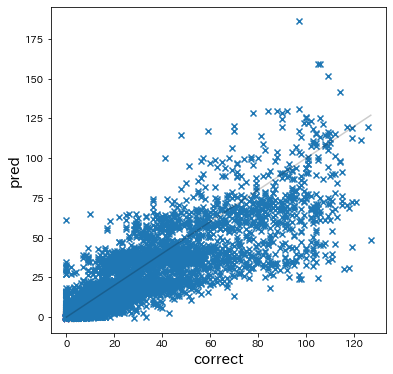

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
x = eval_df
y = test_pred
train_mae = mae(tra_df.y, train_pred)
test_mae =mae(x.y, y)
print('MAE(train):\t{:.5}\nMAE(test):\t{:.5}'.format(train_mae, test_mae))
#自由度調節済決定係数
from sklearn.metrics import r2_score
r2 = 1-(1 - r2_score(x.y, y))*(len(eval_df)-1) / (len(eval_df) - eval_df.shape[1] -1)
print(r2)
y_min, y_max = np.min(x.y), np.max(x.y)
plt.figure(figsize=(6, 6))
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(x.y, y, marker="x")
plt.xlabel("correct",fontsize=15)
plt.ylabel("pred",fontsize=15)

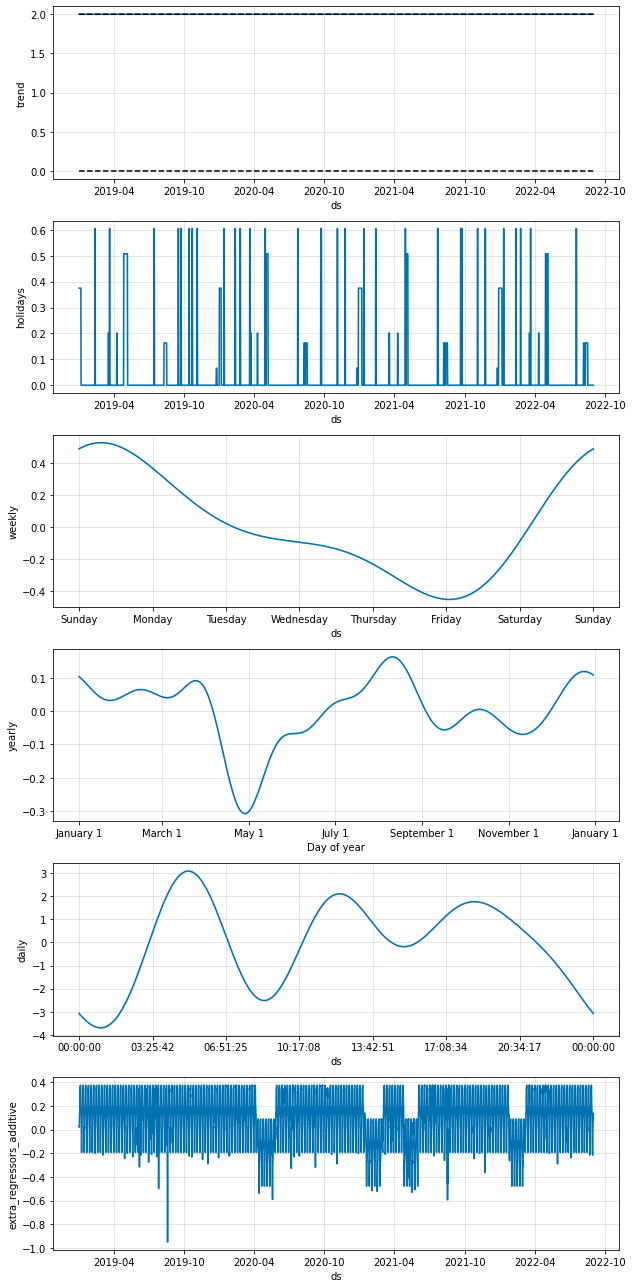

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
#copy = forecast[forecast.ds < "2022-2-1"]
fig = model.plot_components(forecast)
#a = add_changepoints_to_plot(fig.gca(), model, copy)
plt.show()

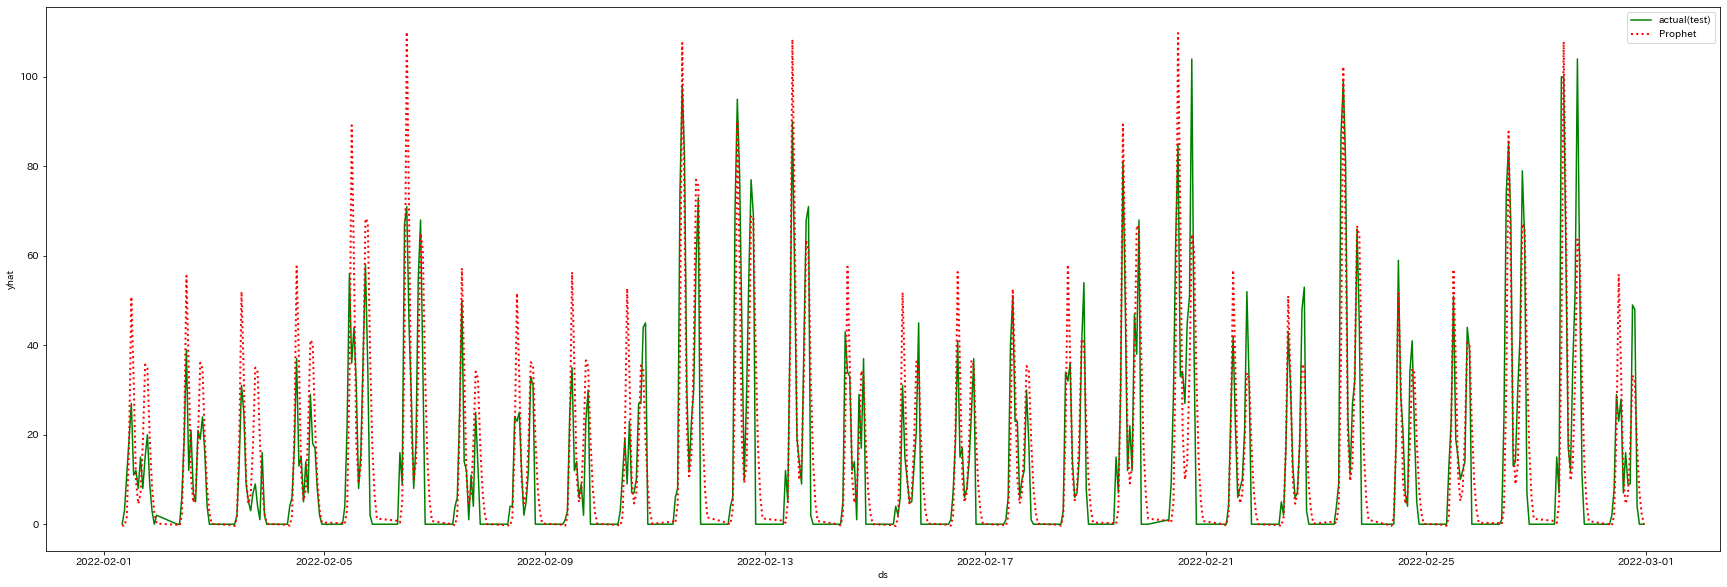

In [ ]:
#予測結果を可視化
plt.subplots(figsize = (30,10))
y_ = eval_df["y"][(eval_df.ds <= "2022-3-1") & (eval_df.ds >= "2022-2-1")]
y_.index = eval_df["ds"][(eval_df.ds <= "2022-3-1") & (eval_df.ds >= "2022-2-1")]
length = len(eval_df[eval_df.ds <= "2022-2-1"]) #日付の浅い方に合わせる
plot_test = test_pred[length:len(y_)+length]
sns.lineplot(y_.index, y_.values ,label="actual(test)",c="g")
sns.lineplot(y_.index, plot_test, label="Prophet", linestyle="dotted", lw=2 , color="r")
plt.legend()

In [ ]:
fig = model.plot(forecast)

In [ ]:
# ライブラリのインストール
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)

In [ ]:
# ライブラリのインポート
from fbprophet.plot import plot_plotly
import plotly.offline as py
# 描画
fig1 = plot_plotly(model, forecast)
# ノードブック上に出力
py.iplot(fig1)

In [ ]:
!pip install optuna
import optuna

In [ ]:
#パラメータのチューニング(1時間20分)
def objective(trial):
    params = {'changepoint_prior_scale' : trial.suggest_uniform('changepoint_prior_scale',0.001,0.5),
              'seasonality_prior_scale' : trial.suggest_uniform('seasonality_prior_scale',0.01,10),
              'seasonality_mode' : 'additive',
              'changepoint_range' : trial.suggest_discrete_uniform('changepoint_range',0.8, 0.95,0.001),
              'n_changepoints' : trial.suggest_int('n_changepoints',20, 35),}
    tra_e["cap"] = 2
    tra_e['floor'] = 0
    model = Prophet(
        yearly_seasonality="auto",
        weekly_seasonality="auto",
        daily_seasonality="auto",**best_params,
        growth="logistic",
        holidays=holidays,
        holidays_prior_scale=0.5 #規定値は10
        )
    model.fit(tra_e)
    eval_e["cap"] = 2
    eval_e['floor'] = 0
    forecast =  model.predict(eval_e)
    val_rmse = np.sqrt(mean_squared_error(eval_e.y, forecast.yhat))
    return val_rmse

study = optuna.create_study(direction="minimize")#評価指標がRMSEなので最小化したい
study.optimize(objective, n_trials=100)
print(study.best_params)